#Import necessary libraries

In [21]:
import pandas as pd
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import figure
import plotly.graph_objects as go

import tensorflow

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

#Exploratory Data Analysis

In [22]:
df = pd.read_csv('AAPL.csv')
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


#Visualizing Apple stock price from 2015 to 2021

In [24]:
#figure(figsize=(8, 6), dpi=80)
fig1 = go.Figure(data=[go.Candlestick(x=df["date"],
                                        open=df["open"],
                                        high=df["high"],
                                        low=df["low"],
                                        close=df["close"])])
fig1.update_layout(title = "Apple Stock Price Analysis", xaxis_rangeslider_visible=True)
fig1.show()

#Visualizing daily returns of Apple stock

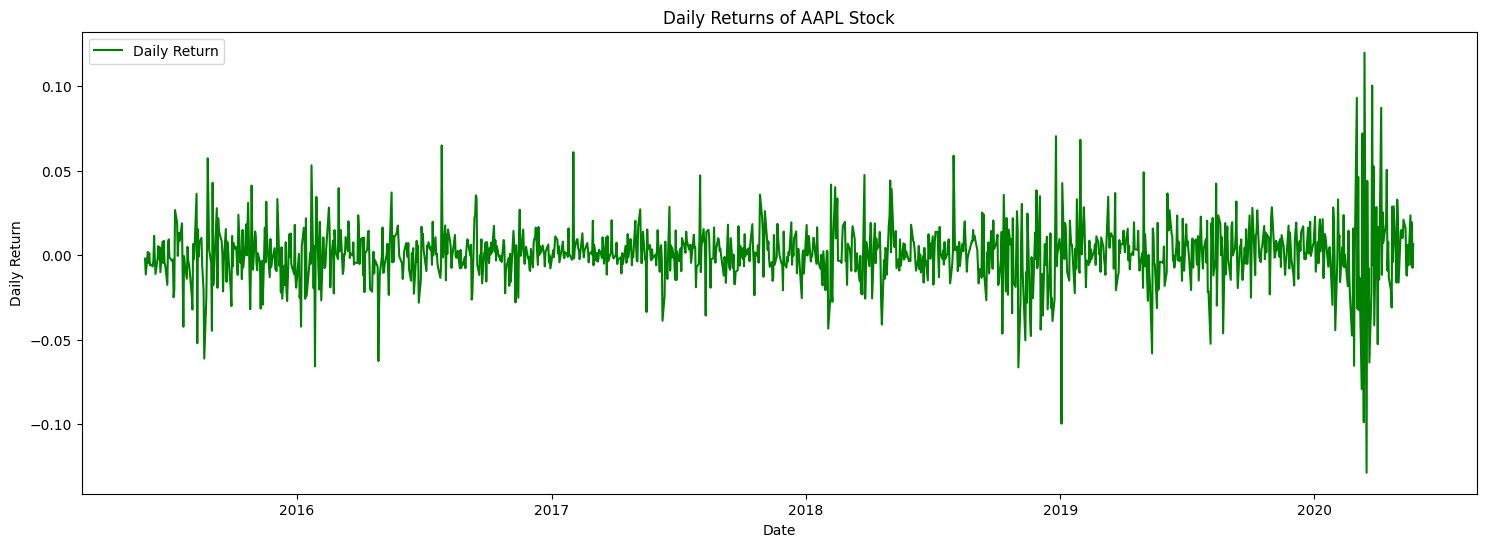

In [38]:
df2 = pd.read_csv('AAPL.csv')
df2['Date'] = pd.to_datetime(df2['date'])
df2.set_index('Date', inplace=True)

# Calculate and visualize daily returns
df2['Daily_Return'] = df2['close'].pct_change()
plt.figure(figsize=(18, 6))
plt.title('Daily Returns of AAPL Stock')
plt.plot(df2.index, df2['Daily_Return'], label='Daily Return', color='green')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

#Data scaling

In [26]:
#Scale the data
df1=df.reset_index()['close']
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


#Splitting dataset into train and test sets

In [27]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

print(training_size)
print(test_size)

817
441


In [28]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [29]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [30]:
print(X_train.shape)
print(y_train.shape)

(716, 100)
(716,)


In [31]:
print(X_test.shape)
print(y_test.shape)

(340, 100)
(340,)


In [32]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

#Building the Stacked LSTM model

In [33]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#Stacked LSTM model training for 200 epochs

In [35]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=64,verbose=1)

Epoch 1/200
12/12 [==============================] - 13s 317ms/step - loss: 0.0207 - val_loss: 0.0607
Epoch 2/200
12/12 [==============================] - 2s 203ms/step - loss: 0.0041 - val_loss: 0.0045
Epoch 3/200
12/12 [==============================] - 3s 294ms/step - loss: 0.0013 - val_loss: 0.0039
Epoch 4/200
12/12 [==============================] - 3s 260ms/step - loss: 8.3690e-04 - val_loss: 0.0064
Epoch 5/200
12/12 [==============================] - 2s 202ms/step - loss: 6.5019e-04 - val_loss: 0.0062
Epoch 6/200
12/12 [==============================] - 2s 205ms/step - loss: 6.3875e-04 - val_loss: 0.0051
Epoch 7/200
10/12 [========================>.....] - ETA: 0s - loss: 6.2303e-04

KeyboardInterrupt: ignored

#Predicting future stock price of Apple

In [ ]:
#Predict and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
#Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
#Calculate RMSE performance metrics
print(math.sqrt(mean_squared_error(y_train,train_predict)))
print(math.sqrt(mean_squared_error(y_test,test_predict)))

In [ ]:
#Plotting the results
#figure(figsize=(8, 6), dpi=80)
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
# demonstrate prediction for the next 30 days
x_input=test_data[341:].reshape(1,-1)
print(x_input.shape)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
print(len(df1))

#Visualizing the price predictions for the next 30 days

In [ ]:
#Prediction plot for the next 30 days
#figure(figsize=(8, 6), dpi=80)
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
#Prediction plot for the next 30 days
#figure(figsize=(8, 6), dpi=80)
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
#Final plot with the prediction for next 30 days
#figure(figsize=(8, 6), dpi=80)
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)